# Diagrams for divergence and curl

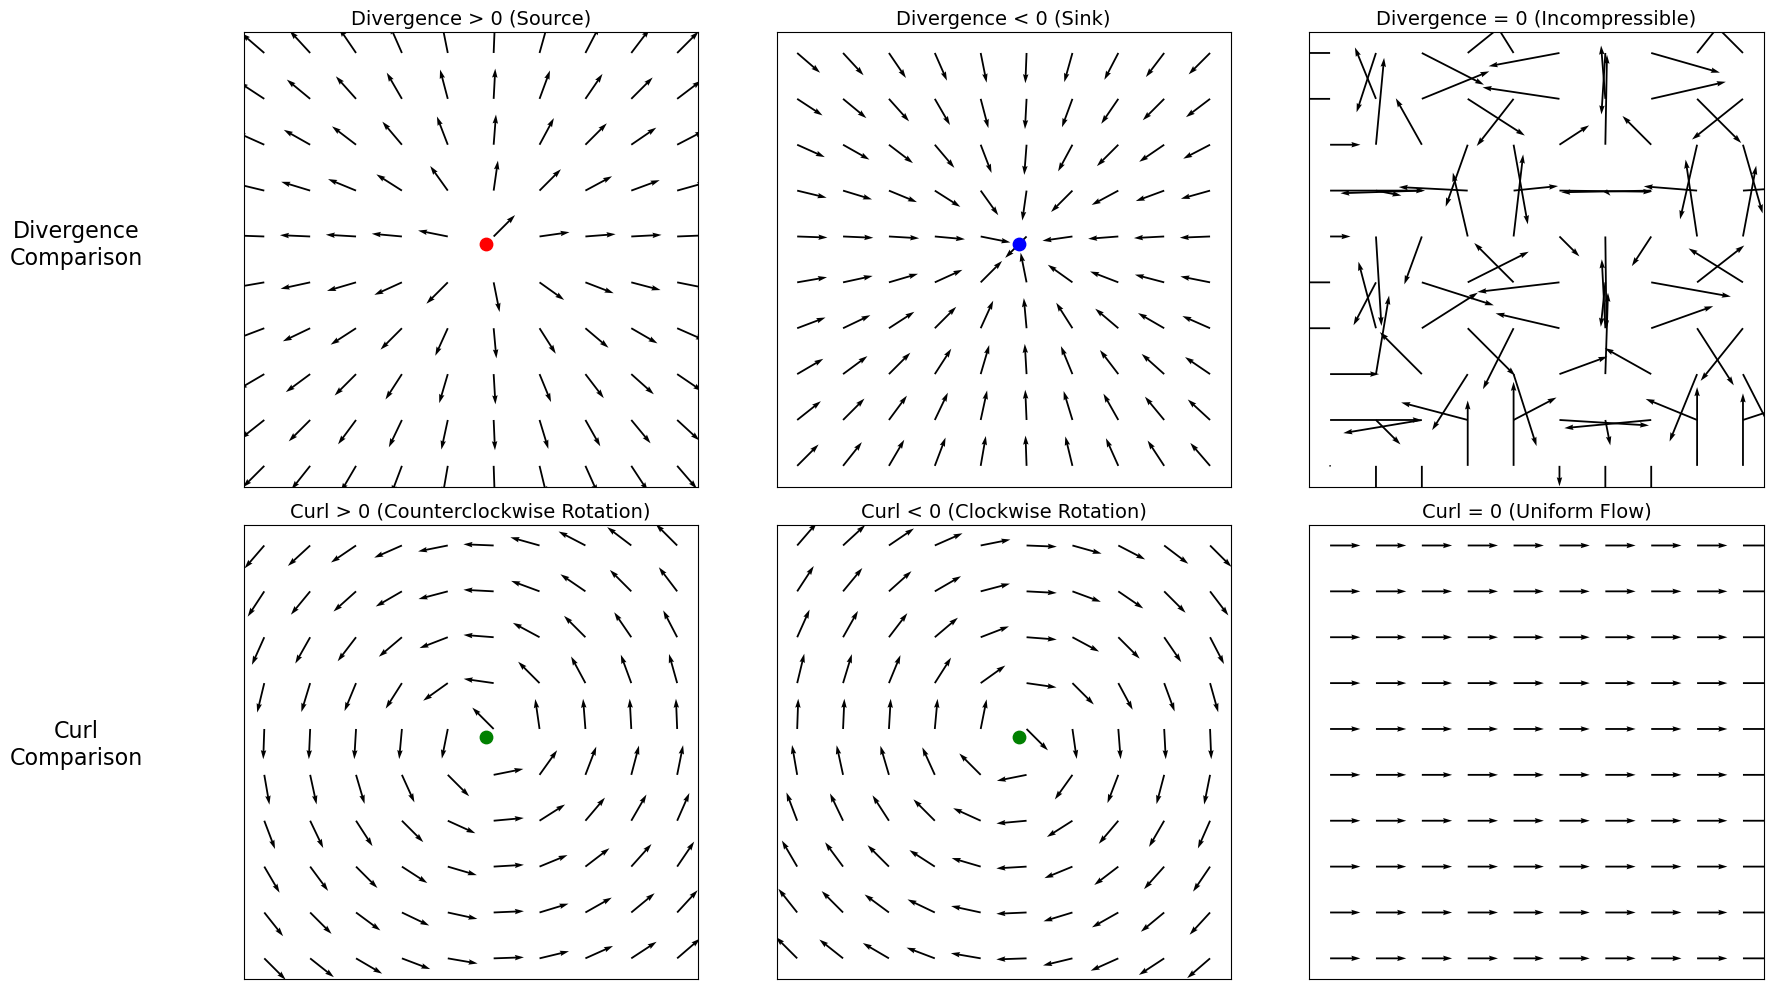

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def create_grid(nx=30, ny=30, domain=((-2, 2), (-2, 2))):
    """Create a 2D grid with specified dimensions."""
    x = np.linspace(domain[0][0], domain[0][1], nx)
    y = np.linspace(domain[1][0], domain[1][1], ny)
    X, Y = np.meshgrid(x, y)
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    return X, Y, dx, dy

def compute_divergence(u, v, dx, dy):
    """Calculate divergence of vector field (u,v)."""
    dudx = np.gradient(u, dx, axis=1)
    dvdy = np.gradient(v, dy, axis=0)
    div = dudx + dvdy
    return div

def compute_curl(u, v, dx, dy):
    """Calculate curl (z-component) of vector field (u,v)."""
    dvdx = np.gradient(v, dx, axis=1)
    dudy = np.gradient(u, dy, axis=0)
    curl = dvdx - dudy
    return curl

# Create flow fields for demonstration
def source_field(X, Y):
    """Source flow (divergence > 0)"""
    r = np.sqrt(X**2 + Y**2) + 1e-10
    u = X / r
    v = Y / r
    return u, v

def sink_field(X, Y):
    """Sink flow (divergence < 0)"""
    r = np.sqrt(X**2 + Y**2) + 1e-10
    u = -X / r
    v = -Y / r
    return u, v

def incompressible_field(X, Y):
    """Incompressible flow (divergence = 0)"""
    u = np.pi * np.cos(np.pi*X) * np.sin(np.pi*Y)
    v = -np.pi * np.sin(np.pi*X) * np.cos(np.pi*Y)
    return u, v

def ccw_rotation_field(X, Y):
    """Counterclockwise rotation (curl > 0, div = 0)"""
    r = np.sqrt(X**2 + Y**2) + 1e-10
    u = -Y / r
    v = X / r
    return u, v

def cw_rotation_field(X, Y):
    """Clockwise rotation (curl < 0, div = 0)"""
    r = np.sqrt(X**2 + Y**2) + 1e-10
    u = Y / r
    v = -X / r
    return u, v

def uniform_flow(X, Y):
    """Uniform flow (curl = 0, div = 0)"""
    u = np.ones_like(X)
    v = np.zeros_like(Y)
    return u, v

def demonstrate_flow_properties():
    """Demonstrate divergence and curl in fluid flow."""
    
    # Create grid
    X, Y, dx, dy = create_grid()
    
    # Setup figure with cleaner style for dissertation - WIDER figure
    plt.style.use('default')
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Increased width from 15 to 18
    
    # ==== ROW 1: DIVERGENCE COMPARISON ====
    
    # Case 1: Divergence > 0 (Source)
    u_pos_div, v_pos_div = source_field(X, Y)
    div_pos = compute_divergence(u_pos_div, v_pos_div, dx, dy)
    ax = axes[0, 0]
    ax.quiver(X[::3, ::3], Y[::3, ::3], u_pos_div[::3, ::3], v_pos_div[::3, ::3], 
             scale=15, color='black', width=0.004)
    # Add source point
    ax.scatter(0, 0, color='red', s=80, zorder=3, marker='o')
    ax.set_title("Divergence > 0 (Source)", fontsize=14)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Case 2: Divergence < 0 (Sink)
    u_neg_div, v_neg_div = sink_field(X, Y)
    div_neg = compute_divergence(u_neg_div, v_neg_div, dx, dy)
    ax = axes[0, 1]
    ax.quiver(X[::3, ::3], Y[::3, ::3], u_neg_div[::3, ::3], v_neg_div[::3, ::3], 
             scale=15, color='black', width=0.004)
    # Add sink point
    ax.scatter(0, 0, color='blue', s=80, zorder=3, marker='o')
    ax.set_title("Divergence < 0 (Sink)", fontsize=14)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Case 3: Divergence = 0 (Incompressible)
    u_zero_div, v_zero_div = incompressible_field(X, Y)
    div_zero = compute_divergence(u_zero_div, v_zero_div, dx, dy)
    ax = axes[0, 2]
    ax.quiver(X[::3, ::3], Y[::3, ::3], u_zero_div[::3, ::3], v_zero_div[::3, ::3], 
             scale=15, color='black', width=0.004)
    ax.set_title("Divergence = 0 (Incompressible)", fontsize=14)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    # ==== ROW 2: CURL COMPARISON (all with zero divergence) ====
    
    # Case 1: Curl > 0 (Counterclockwise Rotation)
    u_pos_curl, v_pos_curl = ccw_rotation_field(X, Y)
    curl_pos = compute_curl(u_pos_curl, v_pos_curl, dx, dy)
    ax = axes[1, 0]
    ax.quiver(X[::3, ::3], Y[::3, ::3], u_pos_curl[::3, ::3], v_pos_curl[::3, ::3], 
             scale=15, color='black', width=0.004)
    # Add rotation center point
    ax.scatter(0, 0, color='green', s=80, zorder=3, marker='o')
    ax.set_title("Curl > 0 (Counterclockwise Rotation)", fontsize=14)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Case 2: Curl < 0 (Clockwise Rotation)
    u_neg_curl, v_neg_curl = cw_rotation_field(X, Y)
    curl_neg = compute_curl(u_neg_curl, v_neg_curl, dx, dy)
    ax = axes[1, 1]
    ax.quiver(X[::3, ::3], Y[::3, ::3], u_neg_curl[::3, ::3], v_neg_curl[::3, ::3], 
             scale=15, color='black', width=0.004)
    # Add rotation center point
    ax.scatter(0, 0, color='green', s=80, zorder=3, marker='o')
    ax.set_title("Curl < 0 (Clockwise Rotation)", fontsize=14)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Case 3: Curl = 0 (Uniform Flow with zero divergence)
    u_zero_curl, v_zero_curl = uniform_flow(X, Y)
    curl_zero = compute_curl(u_zero_curl, v_zero_curl, dx, dy)
    ax = axes[1, 2]
    ax.quiver(X[::3, ::3], Y[::3, ::3], u_zero_curl[::3, ::3], v_zero_curl[::3, ::3], 
             scale=15, color='black', width=0.004)
    ax.set_title("Curl = 0 (Uniform Flow)", fontsize=14)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add row labels - moved further left
    fig.text(0.02, 0.75, "Divergence\nComparison", fontsize=16, ha='center', va='center')
    fig.text(0.02, 0.25, "Curl\nComparison", fontsize=16, ha='center', va='center')
    
    # Wider margin for row labels
    plt.tight_layout(rect=[0.07, 0, 1, 1])  # Increased left margin from 0.05 to 0.07
    
    plt.savefig('vector_field_properties.pdf', format='pdf', bbox_inches='tight')
    plt.show()

# Run the demonstration
demonstrate_flow_properties()

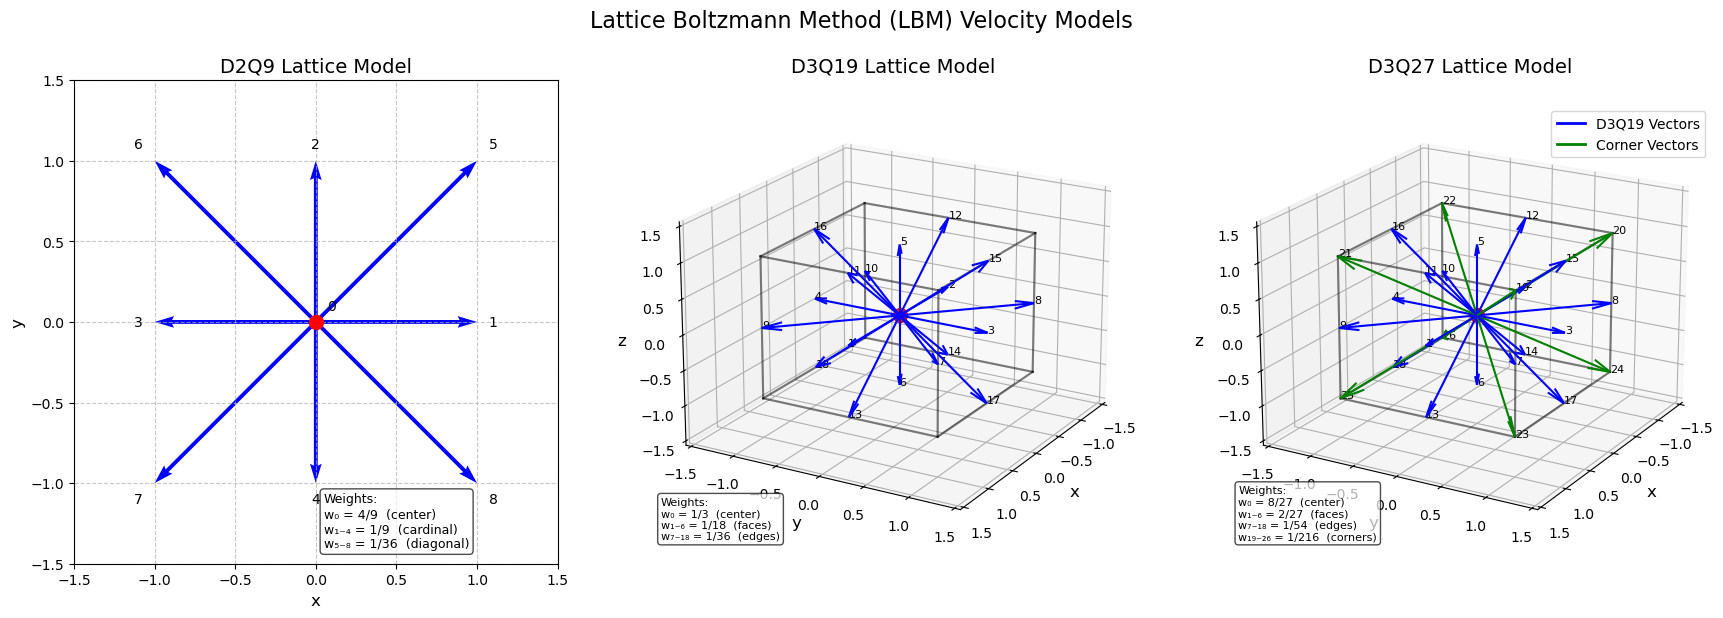

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec

def plot_lbm_models():
    """Create a single figure with D2Q9, D3Q19, and D3Q27 lattice models."""
    fig = plt.figure(figsize=(18, 6))
    gs = GridSpec(1, 3, figure=fig)
    
    # ======= D2Q9 MODEL (left) =======
    ax1 = fig.add_subplot(gs[0, 0])
    
    # Lattice velocities for D2Q9
    velocities = np.array([
        [0, 0],    # 0: Center (rest)
        [1, 0],    # 1: East
        [0, 1],    # 2: North
        [-1, 0],   # 3: West
        [0, -1],   # 4: South
        [1, 1],    # 5: Northeast
        [-1, 1],   # 6: Northwest
        [-1, -1],  # 7: Southwest
        [1, -1]    # 8: Southeast
    ])
    
    # Plot vectors
    origin = np.zeros((9, 2))
    ax1.quiver(
        origin[:, 0], origin[:, 1], 
        velocities[:, 0], velocities[:, 1], 
        angles='xy', scale_units='xy', scale=1,
        color='blue', width=0.008
    )
    
    # Node point
    ax1.scatter(0, 0, color='red', s=100, zorder=3)
    
    # Label directions
    labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
    positions = [
        (0.1, 0.1),       # 0: Center
        (1.1, 0),         # 1: East
        (0, 1.1),         # 2: North
        (-1.1, 0),        # 3: West
        (0, -1.1),        # 4: South
        (1.1, 1.1),       # 5: Northeast
        (-1.1, 1.1),      # 6: Northwest
        (-1.1, -1.1),     # 7: Southwest
        (1.1, -1.1)       # 8: Southeast
    ]
    
    for i, (label, pos) in enumerate(zip(labels, positions)):
        ax1.text(pos[0], pos[1], label, fontsize=10, ha='center', va='center')
    
    ax1.set_xlim(-1.5, 1.5)
    ax1.set_ylim(-1.5, 1.5)
    ax1.set_aspect('equal')
    ax1.set_title('D2Q9 Lattice Model', fontsize=14)
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('y', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Add weight information
    weight_text = (
        "Weights:\n"
        "w₀ = 4/9  (center)\n"
        "w₁₋₄ = 1/9  (cardinal)\n"
        "w₅₋₈ = 1/36  (diagonal)"
    )
    ax1.text(0.05, -1.4, weight_text, fontsize=9, 
            bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))
    
    # ======= D3Q19 MODEL (middle) =======
    ax2 = fig.add_subplot(gs[0, 1], projection='3d')
    
    # D3Q19 velocities
    # Rest + 6 faces + 12 edges
    velocities_d3q19 = np.array([
        [0, 0, 0],     # 0: Center (rest)
        
        # 6 face neighbors
        [1, 0, 0],     # 1: East
        [-1, 0, 0],    # 2: West
        [0, 1, 0],     # 3: North
        [0, -1, 0],    # 4: South
        [0, 0, 1],     # 5: Top
        [0, 0, -1],    # 6: Bottom
        
        # 12 edge neighbors
        [1, 1, 0],     # 7: Northeast
        [-1, 1, 0],    # 8: Northwest
        [1, -1, 0],    # 9: Southeast
        [-1, -1, 0],   # 10: Southwest
        [1, 0, 1],     # 11: East-Top
        [-1, 0, 1],    # 12: West-Top
        [1, 0, -1],    # 13: East-Bottom
        [-1, 0, -1],   # 14: West-Bottom
        [0, 1, 1],     # 15: North-Top
        [0, -1, 1],    # 16: South-Top
        [0, 1, -1],    # 17: North-Bottom
        [0, -1, -1],   # 18: South-Bottom
    ])
    
    # Plot D3Q19
    center = np.array([0, 0, 0])
    
    # Plot velocities as arrows
    for i, velocity in enumerate(velocities_d3q19):
        if i == 0:  # Center point
            ax2.scatter(*center, color='red', s=100, zorder=3)
        else:
            # Scale the velocity for better visualization
            end_point = center + velocity
            ax2.quiver(*center, *velocity, color='blue', arrow_length_ratio=0.15)
            
            # Add small label markers at end points
            ax2.text(end_point[0], end_point[1], end_point[2], str(i), fontsize=8)
    
    # Plot unit cell
    r = [-1, 1]
    for s, e in [(r[0], r[1]), (r[0], r[0]), (r[1], r[1]), (r[0], r[1])]:
        ax2.plot([s, e], [r[0], r[0]], [r[0], r[0]], 'k-', alpha=0.3)
        ax2.plot([s, e], [r[1], r[1]], [r[0], r[0]], 'k-', alpha=0.3)
        ax2.plot([s, e], [r[0], r[0]], [r[1], r[1]], 'k-', alpha=0.3)
        ax2.plot([s, e], [r[1], r[1]], [r[1], r[1]], 'k-', alpha=0.3)
        
        ax2.plot([r[0], r[0]], [s, e], [r[0], r[0]], 'k-', alpha=0.3)
        ax2.plot([r[1], r[1]], [s, e], [r[0], r[0]], 'k-', alpha=0.3)
        ax2.plot([r[0], r[0]], [s, e], [r[1], r[1]], 'k-', alpha=0.3)
        ax2.plot([r[1], r[1]], [s, e], [r[1], r[1]], 'k-', alpha=0.3)
        
        ax2.plot([r[0], r[0]], [r[0], r[0]], [s, e], 'k-', alpha=0.3)
        ax2.plot([r[1], r[1]], [r[0], r[0]], [s, e], 'k-', alpha=0.3)
        ax2.plot([r[0], r[0]], [r[1], r[1]], [s, e], 'k-', alpha=0.3)
        ax2.plot([r[1], r[1]], [r[1], r[1]], [s, e], 'k-', alpha=0.3)
    
    # Add weight information
    ax2.text2D(0.02, 0.05, 
               "Weights:\nw₀ = 1/3  (center)\nw₁₋₆ = 1/18  (faces)\nw₇₋₁₈ = 1/36  (edges)", 
               transform=ax2.transAxes, fontsize=8,
               bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))
    
    ax2.set_title('D3Q19 Lattice Model', fontsize=14)
    ax2.set_xlabel('x', fontsize=12)
    ax2.set_ylabel('y', fontsize=12)
    ax2.set_zlabel('z', fontsize=12)
    ax2.set_xlim(-1.5, 1.5)
    ax2.set_ylim(-1.5, 1.5)
    ax2.set_zlim(-1.5, 1.5)
    ax2.view_init(elev=20, azim=30)  # Adjust viewing angle
    
    # ======= D3Q27 MODEL (right) =======
    ax3 = fig.add_subplot(gs[0, 2], projection='3d')
    
    # D3Q27 velocities
    # D3Q19 + 8 corners
    velocities_d3q27 = np.copy(velocities_d3q19)
    corner_velocities = np.array([
        [1, 1, 1],     # 19: Northeast-Top
        [-1, 1, 1],    # 20: Northwest-Top
        [1, -1, 1],    # 21: Southeast-Top
        [-1, -1, 1],   # 22: Southwest-Top
        [1, 1, -1],    # 23: Northeast-Bottom
        [-1, 1, -1],   # 24: Northwest-Bottom
        [1, -1, -1],   # 25: Southeast-Bottom
        [-1, -1, -1],  # 26: Southwest-Bottom
    ])
    velocities_d3q27 = np.vstack([velocities_d3q27, corner_velocities])
    
    # Plot D3Q27
    # Plot velocities as arrows
    for i, velocity in enumerate(velocities_d3q27):
        if i == 0:  # Center point
            ax3.scatter(*center, color='red', s=100, zorder=3)
        elif i <= 18:  # D3Q19 vectors
            end_point = center + velocity
            ax3.quiver(*center, *velocity, color='blue', arrow_length_ratio=0.15)
            ax3.text(end_point[0], end_point[1], end_point[2], str(i), fontsize=8)
        else:  # Corner vectors
            end_point = center + velocity
            ax3.quiver(*center, *velocity, color='green', arrow_length_ratio=0.15)
            ax3.text(end_point[0], end_point[1], end_point[2], str(i), fontsize=8)
    
    # Plot unit cell
    r = [-1, 1]
    for s, e in [(r[0], r[1]), (r[0], r[0]), (r[1], r[1]), (r[0], r[1])]:
        ax3.plot([s, e], [r[0], r[0]], [r[0], r[0]], 'k-', alpha=0.3)
        ax3.plot([s, e], [r[1], r[1]], [r[0], r[0]], 'k-', alpha=0.3)
        ax3.plot([s, e], [r[0], r[0]], [r[1], r[1]], 'k-', alpha=0.3)
        ax3.plot([s, e], [r[1], r[1]], [r[1], r[1]], 'k-', alpha=0.3)
        
        ax3.plot([r[0], r[0]], [s, e], [r[0], r[0]], 'k-', alpha=0.3)
        ax3.plot([r[1], r[1]], [s, e], [r[0], r[0]], 'k-', alpha=0.3)
        ax3.plot([r[0], r[0]], [s, e], [r[1], r[1]], 'k-', alpha=0.3)
        ax3.plot([r[1], r[1]], [s, e], [r[1], r[1]], 'k-', alpha=0.3)
        
        ax3.plot([r[0], r[0]], [r[0], r[0]], [s, e], 'k-', alpha=0.3)
        ax3.plot([r[1], r[1]], [r[0], r[0]], [s, e], 'k-', alpha=0.3)
        ax3.plot([r[0], r[0]], [r[1], r[1]], [s, e], 'k-', alpha=0.3)
        ax3.plot([r[1], r[1]], [r[1], r[1]], [s, e], 'k-', alpha=0.3)
    
    # Add weight information
    ax3.text2D(0.02, 0.05, 
               "Weights:\nw₀ = 8/27  (center)\nw₁₋₆ = 2/27  (faces)\nw₇₋₁₈ = 1/54  (edges)\nw₁₉₋₂₆ = 1/216  (corners)", 
               transform=ax3.transAxes, fontsize=8,
               bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))
    
    ax3.set_title('D3Q27 Lattice Model', fontsize=14)
    ax3.set_xlabel('x', fontsize=12)
    ax3.set_ylabel('y', fontsize=12)
    ax3.set_zlabel('z', fontsize=12)
    ax3.set_xlim(-1.5, 1.5)
    ax3.set_ylim(-1.5, 1.5)
    ax3.set_zlim(-1.5, 1.5)
    ax3.view_init(elev=20, azim=30)  # Match view angle with D3Q19
    
    # Legend for D3Q27
    from matplotlib.lines import Line2D
    custom_lines = [
        Line2D([0], [0], color='blue', lw=2),
        Line2D([0], [0], color='green', lw=2)
    ]
    ax3.legend(custom_lines, ['D3Q19 Vectors', 'Corner Vectors'], 
              loc='upper right', bbox_to_anchor=(1, 0.95))
    
    # Figure title
    fig.suptitle('Lattice Boltzmann Method (LBM) Velocity Models', fontsize=16, y=0.98)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for suptitle
    plt.savefig('LBM_velocity_models.pdf', format='pdf', bbox_inches='tight')
    plt.show()

# Generate the combined plot
plot_lbm_models()

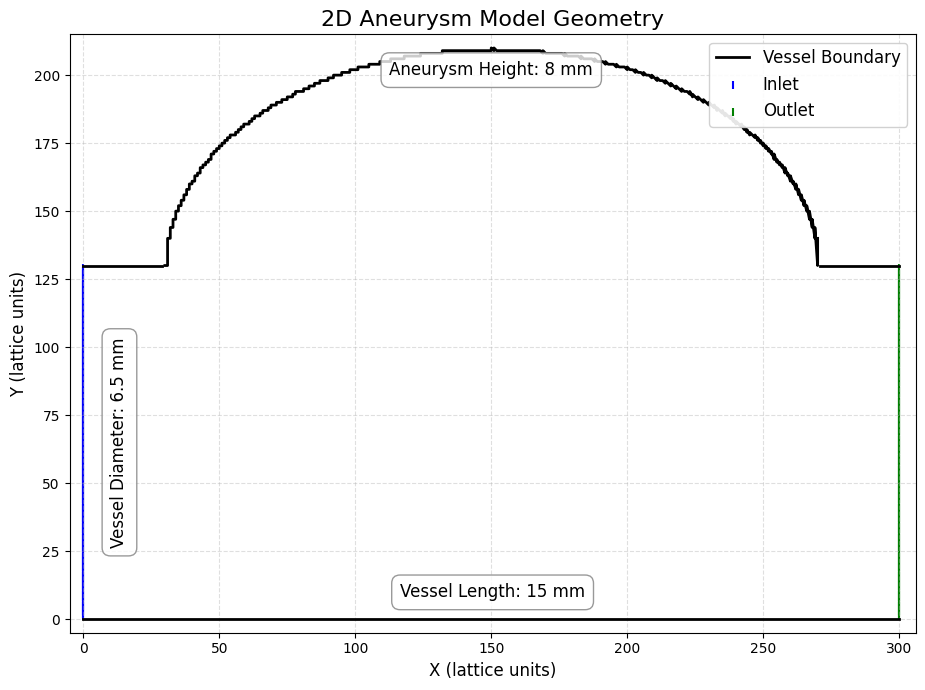

(<Figure size 1000x700 with 1 Axes>,
 <Axes: title={'center': '2D Aneurysm Model Geometry'}, xlabel='X (lattice units)', ylabel='Y (lattice units)'>)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_aneurysm_geometry(vessel_length_mm=15, vessel_diameter_mm=6.5, 
                          bulge_horizontal_mm=12, bulge_vertical_mm=8,
                          resolution_mm=0.05):
    """
    Plot the 2D aneurysm geometry with inlet, outlet, and vessel walls.
    """
    # Convert mm to lattice units
    mm_to_m = 0.001
    resolution_m = resolution_mm * mm_to_m
    vessel_length_lu = int(round(vessel_length_mm * mm_to_m / resolution_m))
    vessel_diameter_lu = int(round(vessel_diameter_mm * mm_to_m / resolution_m))
    bulge_horizontal_lu = int(round(bulge_horizontal_mm * mm_to_m / resolution_m))
    bulge_vertical_lu = int(round((bulge_vertical_mm/2) * mm_to_m / resolution_m))
    
    # Grid shape
    grid_x = vessel_length_lu + 1
    grid_y = vessel_diameter_lu + bulge_vertical_lu + 1
    
    # Vessel center and bulge parameters
    vessel_centre_lu = vessel_diameter_lu // 2
    bulge_centre_x_lu = vessel_length_lu // 2
    bulge_centre_y_lu = vessel_centre_lu + (vessel_diameter_lu // 2)
    
    # Create a figure 
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Parameters for the elliptical bulge
    x0 = bulge_centre_x_lu
    y0 = bulge_centre_y_lu
    a = bulge_horizontal_lu // 2
    b = bulge_vertical_lu
    
    # Generate curve points for the bulge
    curve_x = []
    curve_y = []
    last_y = None
    
    for x_coord in range(x0 - a, x0 + a + 1):
        # Calculate exact y coordinate for upper curve
        y_coord = y0 + b * np.sqrt(1 - ((x_coord - x0)**2 / a**2))
        y_base = int(y_coord)
        
        # Fill gaps between consecutive y coordinates
        if last_y is not None:
            for y_fill in range(min(last_y, y_base), max(last_y, y_base) + 1):
                curve_x.append(x_coord)
                curve_y.append(y_fill)
        else:
            curve_x.append(x_coord)
            curve_y.append(y_base)
            
        last_y = y_base
    
    # Create straight sections of vessel wall
    loc_upper = round(vessel_centre_lu + vessel_diameter_lu // 2)
    loc_lower = round(vessel_centre_lu - vessel_diameter_lu // 2)
    
    # Upper left straight wall
    upper_left_x = list(range(min(curve_x)))
    upper_left_y = [loc_upper] * len(upper_left_x)
    
    # Upper right straight wall
    upper_right_x = list(range(max(curve_x) + 1, grid_x))
    upper_right_y = [loc_upper] * len(upper_right_x)
    
    # Lower straight wall
    lower_x = list(range(grid_x))
    lower_y = [loc_lower] * len(lower_x)
    
    # Inlet and outlet
    inlet_x = [0] * (loc_upper - loc_lower - 1)
    inlet_y = list(range(loc_lower + 1, loc_upper))
    
    outlet_x = [grid_x - 1] * (loc_upper - loc_lower - 1)
    outlet_y = list(range(loc_lower + 1, loc_upper))
    
    # Plot all walls with the same style and color including aneurysm boundary
    wall_color = 'k'  # Using black for all walls
    ax.plot(upper_left_x, upper_left_y, color=wall_color, linewidth=2, label='Vessel Boundary')
    ax.plot(upper_right_x, upper_right_y, color=wall_color, linewidth=2)  # No label
    ax.plot(lower_x, lower_y, color=wall_color, linewidth=2)  # No label
    ax.plot(curve_x, curve_y, color=wall_color, linewidth=2)  # Same color as vessel walls
    
    # Plot inlet and outlet
    ax.scatter(inlet_x, inlet_y, color='blue', s=40, marker='|', label='Inlet')
    ax.scatter(outlet_x, outlet_y, color='green', s=40, marker='|', label='Outlet')
    
    # Set up the plot
    ax.set_xlim(-5, grid_x + 5)
    ax.set_ylim(-5, max(curve_y) + 5)
    ax.set_aspect('equal')
    ax.set_title('2D Aneurysm Model Geometry', fontsize=16)
    ax.set_xlabel('X (lattice units)', fontsize=12)
    ax.set_ylabel('Y (lattice units)', fontsize=12)
    
    # Create a cleaner legend with fewer entries
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper right', framealpha=0.9, fontsize=12)
    
    # Add grid with softer appearance
    ax.grid(True, linestyle='--', alpha=0.4)
    
    # Add text annotations for dimensions - MOVED INWARD toward center
    # Aneurysm height - moved lower (closer to the aneurysm)
    ax.text(bulge_centre_x_lu, max(curve_y) - 10, f'Aneurysm Height: {bulge_vertical_mm} mm', 
            horizontalalignment='center', fontsize=12,
            bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8, boxstyle='round,pad=0.5'))
    
    # Vessel length - moved upward (closer to the vessel)
    ax.text(grid_x/2, loc_lower + 8, f'Vessel Length: {vessel_length_mm} mm', 
            horizontalalignment='center', fontsize=12,
            bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8, boxstyle='round,pad=0.5'))
    
    # Vessel diameter - moved rightward (closer to the vessel)
    ax.text(10, (loc_upper + loc_lower)/2, f'Vessel Diameter: {vessel_diameter_mm} mm', 
            verticalalignment='center', rotation=90, fontsize=12,
            bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8, boxstyle='round,pad=0.5'))
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax

# Plot with the parameters from standard_run.py
plot_aneurysm_geometry(
    vessel_length_mm=15,
    vessel_diameter_mm=6.5,
    bulge_horizontal_mm=12,
    bulge_vertical_mm=8,
    resolution_mm=0.05
)

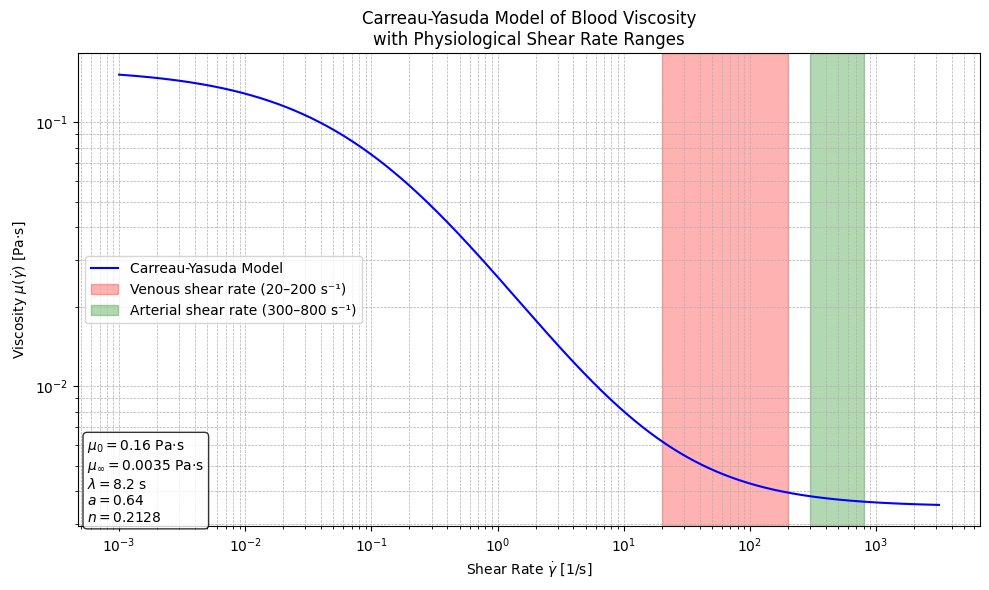

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Carreau-Yasuda model parameters (typical for human blood)
mu_0 = 0.16      # Zero-shear viscosity [Pa·s]
mu_inf = 0.0035  # Infinite-shear viscosity [Pa·s]
lambda_cy = 8.2  # Time constant [s]
a = 0.64         # Yasuda parameter
n = 0.2128       # Power-law index

# Shear rate range
shear_rate = np.logspace(-3, 3.5, 1000)  # From 0.001 to ~3162 1/s

# CY viscosity calculation
def carreau_yasuda(mu_0, mu_inf, lam, a, n, shear_rate):
    return mu_inf + (mu_0 - mu_inf) * (1 + (lam * shear_rate)**a)**((n - 1)/a)

viscosity = carreau_yasuda(mu_0, mu_inf, lambda_cy, a, n, shear_rate)

# Plot
plt.figure(figsize=(10, 6))
plt.loglog(shear_rate, viscosity, label='Carreau-Yasuda Model', color='blue')

# Highlight physiological ranges
plt.axvspan(20, 200, color='red', alpha=0.3, label='Venous shear rate (20–200 s⁻¹)')
plt.axvspan(300, 800, color='green', alpha=0.3, label='Arterial shear rate (300–800 s⁻¹)')

# Parameter box text
param_text = (
    r"$\mu_0 = 0.16$ Pa·s" + "\n" +
    r"$\mu_{\infty} = 0.0035$ Pa·s" + "\n" +
    r"$\lambda = 8.2$ s" + "\n" +
    r"$a = 0.64$" + "\n" +
    r"$n = 0.2128$"
)
plt.text(0.01, 0.01, param_text, transform=plt.gca().transAxes,
         fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.xlabel('Shear Rate $\dot{\gamma}$ [1/s]')
plt.ylabel('Viscosity $\mu(\dot{\gamma})$ [Pa·s]')
plt.title('Carreau-Yasuda Model of Blood Viscosity\nwith Physiological Shear Rate Ranges')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# References inside:
# https://chatgpt.com/c/680f3f72-6eb0-8000-a24a-880385a130c2
# compare params with actual used in the code
